In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df = pd.read_csv('data/seven_feature_clean_.csv')

In [25]:
df['MinuteOfTheDay']=df['MinuteOfTheDay']/60
df.head()

,Unnamed: 0,DayOfTheWeek,MinuteOfTheDay,Latitude,Longitude,ParkingSpaceCount,ParkingTimeLimitCategory,ParkingCategory,AvailableSpace
0,28459351,1,720.0,-122.330015,47.616454,7,240.0,1,0
1,22643110,1,720.0,-122.321955,47.604256,9,120.0,2,8
2,26832891,1,720.0,-122.330488,47.619229,10,120.0,1,4
3,27987115,1,720.0,-122.323533,47.612504,8,120.0,2,8
4,28147181,1,720.0,-122.323931,47.608905,4,120.0,1,0


In [26]:
y = df["AvailableSpace"]
    # All other columns will be used as features when training our model
X = df.drop(["AvailableSpace","ParkingSpaceCount","Unnamed: 0","ParkingCategory","ParkingTimeLimitCategory"], axis=1)

In [32]:
from sklearn.model_selection import train_test_split 
from sklearn import datasets, linear_model
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.33, random_state=0)

model = RandomForestRegressor(max_depth=16, random_state=0, n_jobs=-1)
model.fit(X_train, y_train)
 
y_pred = model.predict(X_test)
print("Coefficient of determination: %.2f" % r2_score(y_test, y_pred))

Coefficient of determination: 0.86


In [30]:
X.columns

Index(['DayOfTheWeek', 'MinuteOfTheDay', 'Latitude', 'Longitude'], dtype='object')

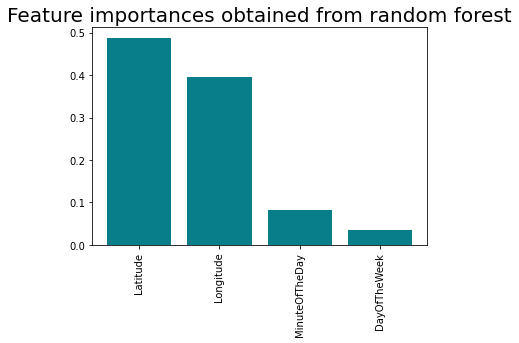

In [33]:
import matplotlib.pyplot as plt
importances = pd.DataFrame(data={
    'Features': X_train.columns,
    'Importance': model.feature_importances_
})
importances = importances.sort_values(by='Importance', ascending=False)

plt.bar(x=importances['Features'], height=importances['Importance'], color='#087E8B')
plt.title('Feature importances obtained from random forest', size=20)
plt.xticks(rotation='vertical')
plt.show()

In [34]:
from joblib import dump, load
dump(model, 'random-forest.joblib')

['random-forest.joblib']